In [1]:
import os
os.environ['XLA_FLAGS'] = '--xla_cpu_enable_fast_math=false'                                     


import jax.numpy as jnp
import numpy as onp
from jax.scipy.stats import norm
from scipy.stats import norm as spnorm
from jax import jit
from jax import vmap
from jax import grad
from jax.config import config; config.update("jax_enable_x64", True)



from ml_tools.jax_kernels import ard_rbf_kernel_efficient

In [2]:
# Let's make a really simple example.
onp.random.seed(2)
x = onp.random.uniform(-2, 2, size=50).reshape(-1, 1)

In [3]:
lscale = onp.reshape(onp.random.uniform(1, 5), (1,))
alpha = 1.

k_true = ard_rbf_kernel_efficient(x, x, alpha, lscale, jitter=0)

/anaconda2/envs/jax/lib/python3.7/site-packages/jax/lib/xla_bridge.py:114: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [4]:
draw = onp.random.multivariate_normal(onp.zeros(x.shape[0]), k_true)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

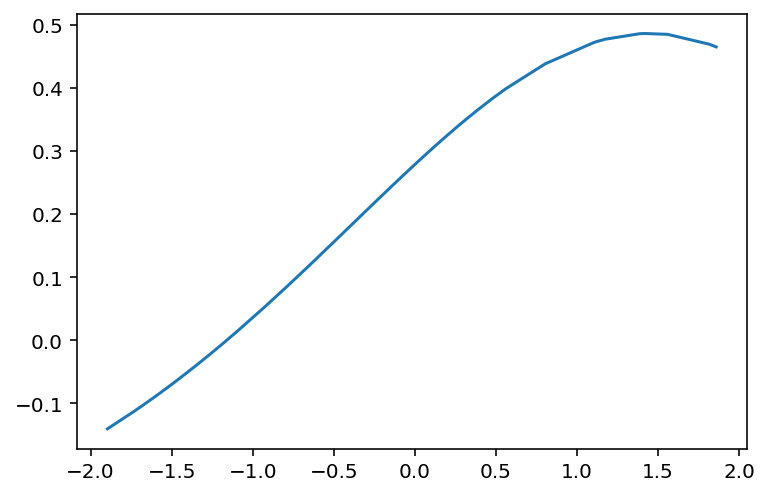

In [6]:
order = onp.argsort(x[:, 0])

plt.plot(x[order], draw[order])

In [7]:
# Draw some data
probs = spnorm.cdf(draw)

In [8]:
y = onp.random.binomial(1, probs)

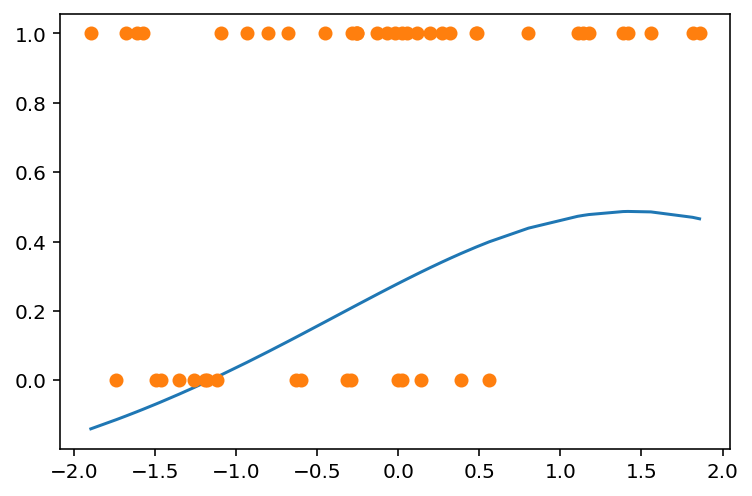

In [9]:
plt.plot(x[order], draw[order])
plt.plot(x[order], y[order], marker='o', linestyle='none')

In [10]:
# Great. I have my input data x, and my outcomes y.

In [11]:
from svgp import get_starting_m_and_l

In [12]:
n_inducing = 10
m, L = get_starting_m_and_l(n_inducing)

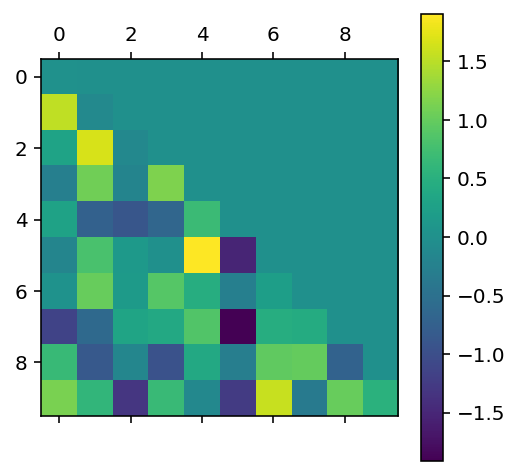

In [13]:
plt.matshow(L)
plt.colorbar()

In [14]:
Z = onp.random.uniform(-2, 2, 10).reshape(-1, 1)

In [23]:
from svgp import compute_objective, bernoulli_probit_lik, extract_params

In [18]:
from functools import partial
kern_fn = partial(ard_rbf_kernel_efficient, alpha=1., rho=jnp.array([2.]))

In [20]:
from jax import grad

In [36]:
def rbf_bernoulli_objective(theta):
    
    m, L, kern_params = extract_params(
        theta, n_inducing, square_kern_params=True)
    
    kern_fn = partial(
        ard_rbf_kernel_efficient, alpha=kern_params[0],
        rho=kern_params[1:])
    
    cur_objective = -compute_objective(
        x, y, m, L, Z, bernoulli_probit_lik, kern_fn)

    print(cur_objective)
    
    return cur_objective

def to_optimize(theta):
    
    return rbf_bernoulli_objective(theta), grad(rbf_bernoulli_objective)(theta)

In [37]:
start_vals = jnp.concatenate([
    onp.random.randn(n_inducing),
    L[onp.tril_indices_from(L)],
    jnp.reshape(alpha, (-1,)),
    jnp.reshape(lscale, (-1,))
])

In [38]:
from scipy.optimize import minimize

In [41]:
result = minimize(to_optimize, start_vals, jac=True, tol=1e-1)

1769565.4441572553
Traced<ConcreteArray(1769565.4441572553)>with<JVPTrace(level=2/0)>
1769565.4441572553
Traced<ConcreteArray(1769565.4441572553)>with<JVPTrace(level=2/0)>
1128964.4786486672
Traced<ConcreteArray(1128964.4786486672)>with<JVPTrace(level=2/0)>
260912.64385803987
Traced<ConcreteArray(260912.64385803987)>with<JVPTrace(level=2/0)>
2593334.756854505
Traced<ConcreteArray(2593334.756854505)>with<JVPTrace(level=2/0)>
110237.50037847186
Traced<ConcreteArray(110237.50037847186)>with<JVPTrace(level=2/0)>
129.1375966398487
Traced<ConcreteArray(129.1375966398487)>with<JVPTrace(level=2/0)>
250007203.76486713
Traced<ConcreteArray(250007203.76486713)>with<JVPTrace(level=2/0)>
128.58825516779086
Traced<ConcreteArray(128.58825516779086)>with<JVPTrace(level=2/0)>
75.38801833013751
Traced<ConcreteArray(75.38801833013751)>with<JVPTrace(level=1/0)>
88288.28376259799
Traced<ConcreteArray(88288.28376259799)>with<JVPTrace(level=1/0)>
69.66550198740273
Traced<ConcreteArray(69.66550198740273)>with

38.74121217193329
Traced<ConcreteArray(38.74121217193329)>with<JVPTrace(level=1/0)>
38.565026181244555
Traced<ConcreteArray(38.565026181244555)>with<JVPTrace(level=1/0)>
38.31988993944851
Traced<ConcreteArray(38.31988993944851)>with<JVPTrace(level=1/0)>
38.184163409571454
Traced<ConcreteArray(38.184163409571454)>with<JVPTrace(level=1/0)>
38.024654096779
Traced<ConcreteArray(38.024654096779)>with<JVPTrace(level=1/0)>
37.84620748583603
Traced<ConcreteArray(37.84620748583603)>with<JVPTrace(level=1/0)>
38.131447186203346
Traced<ConcreteArray(38.131447186203346)>with<JVPTrace(level=1/0)>
37.790080454482556
Traced<ConcreteArray(37.790080454482556)>with<JVPTrace(level=1/0)>
37.7199455224821
Traced<ConcreteArray(37.7199455224821)>with<JVPTrace(level=1/0)>
37.677186953516596
Traced<ConcreteArray(37.677186953516596)>with<JVPTrace(level=1/0)>
37.64601588976565
Traced<ConcreteArray(37.64601588976565)>with<JVPTrace(level=1/0)>
37.60325266014927
Traced<ConcreteArray(37.60325266014927)>with<JVPTrace(

Traced<ConcreteArray(34.27827792449063)>with<JVPTrace(level=1/0)>
34.253991874944894
Traced<ConcreteArray(34.253991874944894)>with<JVPTrace(level=1/0)>
34.22566524666447
Traced<ConcreteArray(34.22566524666447)>with<JVPTrace(level=1/0)>
34.204681516852006
Traced<ConcreteArray(34.204681516852006)>with<JVPTrace(level=1/0)>
34.17646424587742
Traced<ConcreteArray(34.17646424587742)>with<JVPTrace(level=1/0)>
34.145801918459725
Traced<ConcreteArray(34.145801918459725)>with<JVPTrace(level=1/0)>
34.129775862065976
Traced<ConcreteArray(34.129775862065976)>with<JVPTrace(level=1/0)>
34.10549422174001
Traced<ConcreteArray(34.10549422174001)>with<JVPTrace(level=1/0)>
34.076659208484955
Traced<ConcreteArray(34.076659208484955)>with<JVPTrace(level=1/0)>
34.040160775825925
Traced<ConcreteArray(34.040160775825925)>with<JVPTrace(level=1/0)>
33.993585489321724
Traced<ConcreteArray(33.993585489321724)>with<JVPTrace(level=1/0)>
33.932728977311626
Traced<ConcreteArray(33.932728977311626)>with<JVPTrace(level=

32.195374491741795
Traced<ConcreteArray(32.195374491741795)>with<JVPTrace(level=1/0)>
32.163679910641086
Traced<ConcreteArray(32.163679910641086)>with<JVPTrace(level=1/0)>
32.117765664223285
Traced<ConcreteArray(32.117765664223285)>with<JVPTrace(level=1/0)>
32.15866171884912
Traced<ConcreteArray(32.15866171884912)>with<JVPTrace(level=1/0)>
32.0953158590232
Traced<ConcreteArray(32.0953158590232)>with<JVPTrace(level=1/0)>
32.073475568976235
Traced<ConcreteArray(32.073475568976235)>with<JVPTrace(level=1/0)>
32.05073919605126
Traced<ConcreteArray(32.05073919605126)>with<JVPTrace(level=1/0)>
32.046317139746
Traced<ConcreteArray(32.046317139746)>with<JVPTrace(level=1/0)>
32.03740550555857
Traced<ConcreteArray(32.03740550555857)>with<JVPTrace(level=1/0)>
32.02909498485419
Traced<ConcreteArray(32.02909498485419)>with<JVPTrace(level=1/0)>
32.02258057230907
Traced<ConcreteArray(32.02258057230907)>with<JVPTrace(level=1/0)>
32.018011686905005
Traced<ConcreteArray(32.018011686905005)>with<JVPTrace(